In [8]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

C:\Users\kofff\Anaconda3\envs\py33\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Линейная регрессия

Генерируем данные и выводим их на графике

In [2]:
m = 100
a, b = 0, 5
X = a + b * np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]
thetas = np.array([4, -2]).reshape(-1, 1)
y = X_b.dot(thetas) + np.random.randn(m, 1)

Text(0, 0.5, 'Y')

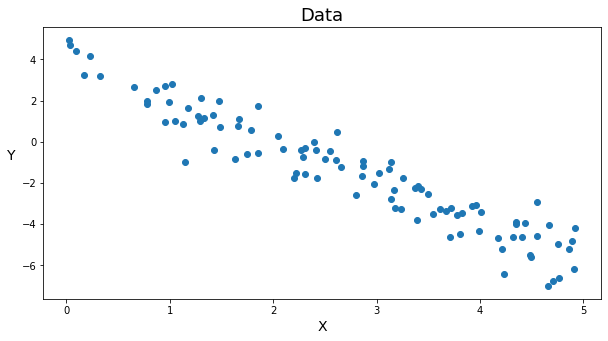

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.title('Data', fontsize=18)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)

## Нормальное уравнение

Находим вектор параметров через нормальное уравнение

In [4]:
predict_thetas = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
predict_thetas

array([[ 3.83122874],
       [-1.93901932]])

Строим линию регрессии по заданным X и предсказанным Y

In [5]:
X_new = np.array([[a], [b]])
y_predict = np.c_[np.ones((2, 1)), X_new].dot(predict_thetas)

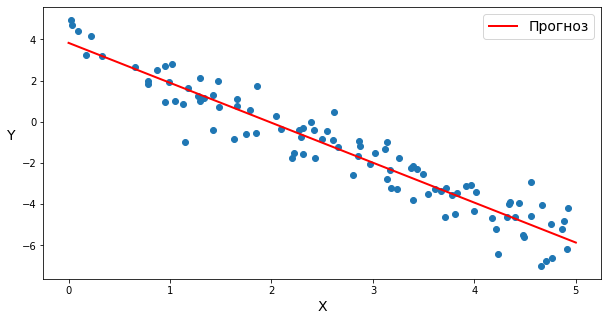

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Прогноз')
plt.legend(loc="upper right", fontsize=14)

Сравним результаты с аналогичным методом из Scikit-Learn

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

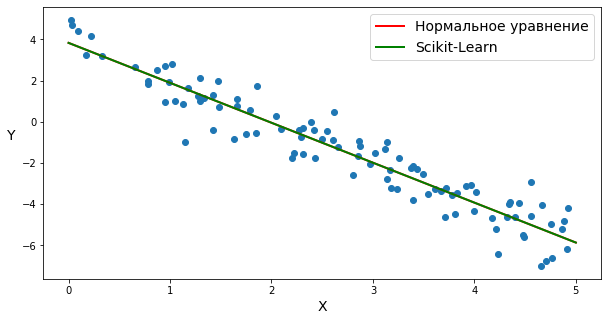

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Нормальное уравнение')
plt.plot(X_new, lr.predict(X_new), 'g-', linewidth=2, label='Scikit-Learn')
plt.legend(loc="upper right", fontsize=14)

In [9]:
error_normal_equation = np.sqrt(mean_squared_error(thetas, predict_thetas))
error_sklearn_lr = np.sqrt(mean_squared_error(thetas, np.vstack([lr.intercept_, lr.coef_])))

In [10]:
error_sklearn_lr - error_normal_equation

-3.2085445411667024e-14

## Градиентный спуск

### Пакетный градиентный спуск

In [11]:
def butch_gd(X, y, n_iterations=1000, eta=0.01, thetas_buf=None):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    for i in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

In [12]:
butch_gd(X, y)

array([[ 3.74405266],
       [-1.91299422]])

#### Графическая демонстрация пакетного градиентного спуска 

In [13]:
def draw_plot_gd(X, y, n_iterations=1000, n_lines=5, eta=0.01):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
    plt.axis([0, 2, -5, 8])
    
    X_new = np.array([[a], [b]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    
    line_iters = np.linspace(0, 1000-1, n_lines, dtype=int)
    
    for i in range(n_iterations):
        y_predict = X_new_b.dot(thetas)

        if i in line_iters:
            plt.plot(X_new, y_predict, 'g-', linewidth=1) 
        if i == n_iterations-1:
            plt.plot(X_new, y_predict, 'r--', linewidth=2, label='Прогноз')
                
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
        thetas -= eta * gradients
        
    plt.legend(loc="upper right", fontsize=14)

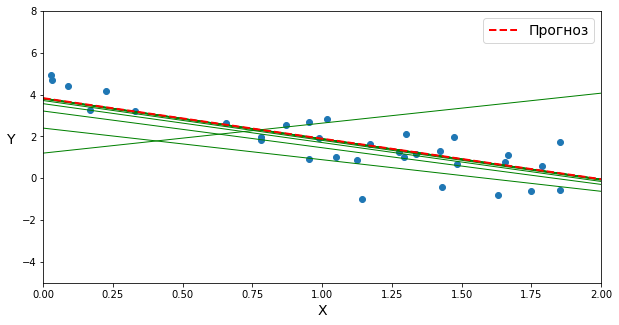

In [14]:
draw_plot_gd(X, y, n_iterations=10000, n_lines=10, eta=0.02)

### Мини-пакетный градиентный спуск

In [15]:
def mini_butch_gd(X, y, n_iterations=1000, eta=0.01, size=0.01, thetas_buf=None):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    indexes = list(range(m))
    size_minibatch = int(size * m)
    
    for i in range(n_iterations):
        sample = random.sample(indexes, size_minibatch)
        minibatch_X = X_b[sample]
        minibatch_y = y[sample]
        gradients = 2/size_minibatch * minibatch_X.T.dot(minibatch_X.dot(thetas) - minibatch_y)
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

In [16]:
mini_butch_gd(X, y, n_iterations=1000, size=0.5)

array([[ 3.75003281],
       [-1.91705842]])

#### Графическая демонстрация мини-пакетного градиентного спуска 

In [17]:
def draw_plot_gd(X, y, n_iterations=1000, n_lines=5, eta=0.01, size=0.01):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    indexes = list(range(m))
    size_minibatch = int(size * m)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
    plt.axis([0, 2, -5, 8])
    
    X_new = np.array([[a], [b]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    
    line_iters = np.linspace(0, 1000-1, n_lines, dtype=int)
    
    for i in range(n_iterations):
        y_predict = X_new_b.dot(thetas)

        if i in line_iters:
            plt.plot(X_new, y_predict, 'g-', linewidth=1) 
        if i == n_iterations-1:
            plt.plot(X_new, y_predict, 'r--', linewidth=2, label='Прогноз')
            
        sample = random.sample(indexes, size_minibatch)
        minibatch_X = X_b[sample]
        minibatch_y = y[sample]
        gradients = 2/size_minibatch * minibatch_X.T.dot(minibatch_X.dot(thetas) - minibatch_y)
        thetas -= eta * gradients
                 
    plt.legend(loc="upper right", fontsize=14)

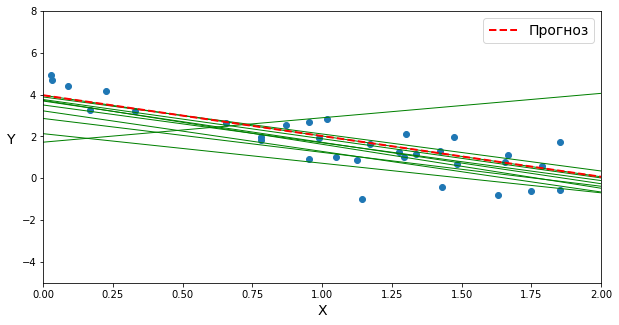

In [18]:
draw_plot_gd(X, y, n_lines=10)

### Стохастический градиентный спуск

Функция, которая определяет скорость обучения на каждой итерации, называется
графиком обучения (learning schedule)

In [19]:
def sgd(X, y, n_iterations=1000, eta=0.01, thetas_buf=None):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    for i in range(n_iterations):
        random_index = np.random.randint(0, m)
        xi = X_b[random_index].reshape(1, -1)
        yi = y[random_index]
        
        gradients = 2 * xi.T.dot(xi.dot(thetas) - yi)
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

In [20]:
sgd(X, y, 1000)

array([[ 3.69180036],
       [-2.0481671 ]])

#### Графическая демонстрация стохастического градиентного спуска 

In [21]:
def draw_plot_gd(X, y, n_iterations=1000, n_lines=5, eta=0.01):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
    plt.axis([0, 2, -5, 8])
    
    X_new = np.array([[a], [b]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    
    line_iters = np.linspace(0, 1000-1, n_lines, dtype=int)
    
    for i in range(n_iterations):
        y_predict = X_new_b.dot(thetas)

        if i in line_iters:
            plt.plot(X_new, y_predict, 'g-', linewidth=1) 
        if i == n_iterations-1:
            plt.plot(X_new, y_predict, 'r--', linewidth=2, label='Прогноз')
            
        random_index = np.random.randint(0, m)
        xi = X_b[random_index].reshape(1, -1)
        yi = y[random_index]
        
        gradients = 2 * xi.T.dot(xi.dot(thetas) - yi)
        thetas -= eta * gradients
                 
    plt.legend(loc="upper right", fontsize=14)

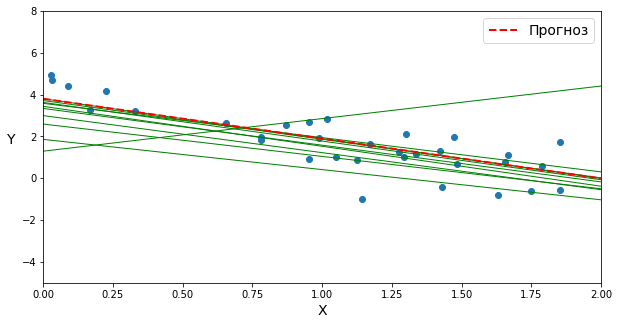

In [22]:
draw_plot_gd(X, y, n_lines=10)

### Сравнение

In [23]:
def get_path_gd(X, y, n_iterations=1000, eta=0.01, size=0.01):
    bgd_thetas = []
    mgd_thetas = []
    sgd_thetas = []
    
    butch_gd(X, y, n_iterations=n_iterations, eta=eta, thetas_buf=bgd_thetas)
    mini_butch_gd(X, y, n_iterations=n_iterations, eta=eta, size=size, thetas_buf=mgd_thetas)
    sgd(X, y, n_iterations=n_iterations, eta=eta, thetas_buf=sgd_thetas)
    
    return bgd_thetas, mgd_thetas, sgd_thetas

In [24]:
def print_gds(thetas, etalon_thetas):
    bgd_thetas = np.vstack(thetas[0]) 
    mgd_thetas = np.vstack(thetas[1]) 
    sgd_thetas = np.vstack(thetas[2])
    
    plt.figure(figsize=(20, 20))
    plt.xlabel(r"$\theta_0$", fontsize=14)
    plt.ylabel(r"$\theta_1$", rotation=0, fontsize=14, labelpad=10)
    plt.axis([0.5, 4.2, -2.5, 0.1])
    
    plt.plot(bgd_thetas[:, 0], bgd_thetas[:, 1], "r-s", linewidth=1, label="Butch GD")
    plt.plot(mgd_thetas[:, 0], mgd_thetas[:, 1], "g-+", linewidth=1, label="Mini-Butch GD")
    plt.plot(sgd_thetas[:, 0], sgd_thetas[:, 1], "b-o", linewidth=1, label="SGD")
    
    plt.plot([[etalon_thetas[0]],[etalon_thetas[0]]], [[-10], [10]], "k-",linewidth=2)
    plt.plot([[-5],[15]], [[etalon_thetas[1]], [etalon_thetas[1]]], "k-",linewidth=2)
    
    plt.legend(loc="upper right", fontsize=14)

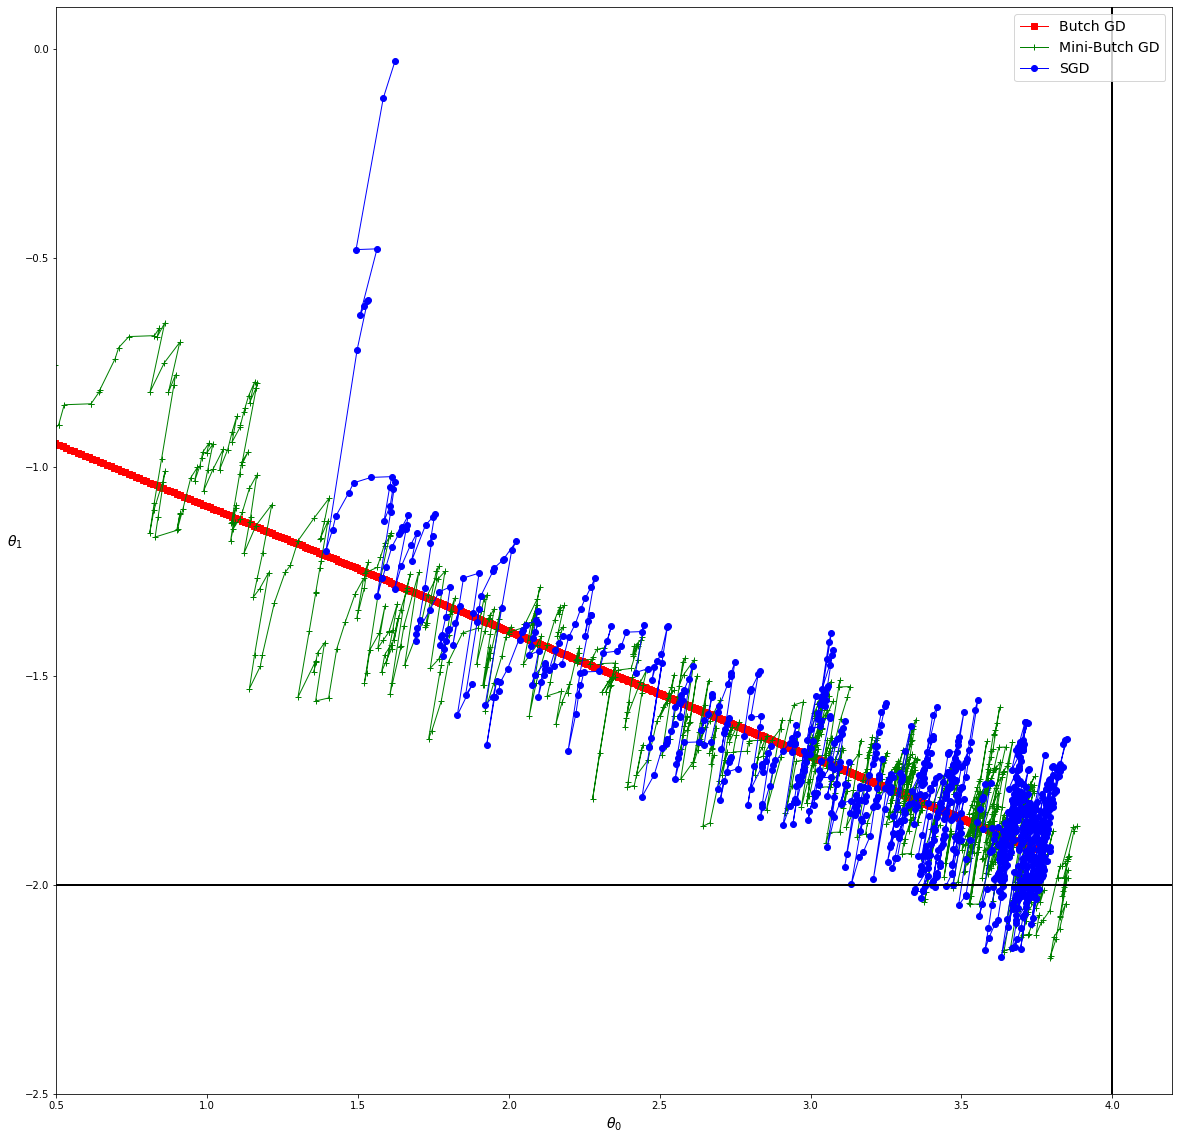

In [25]:
print_gds(get_path_gd(X, y, n_iterations=1000), etalon_thetas=thetas.ravel())

# Полиномиальная регрессия

Генерируем данные 3-ей степени

In [26]:
m = 200
a, b = -2, 4
X = a + b * np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X, X**2, X**3]
thetas = np.array([1, -2, 3, -4]).reshape(-1, 1)
y = X_b.dot(thetas) + np.random.randn(m, 1)

[-1.5, 2, -13, 13]

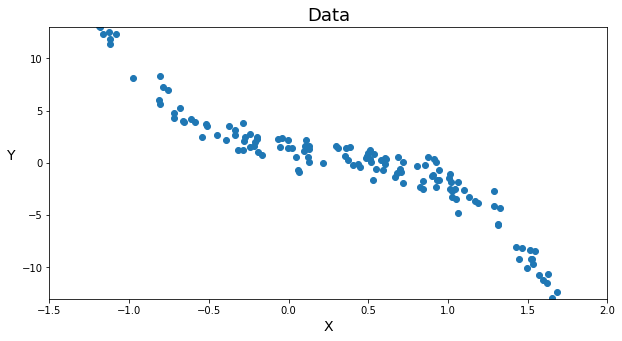

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.title('Data', fontsize=18)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
plt.axis([-1.5, 2, -13, 13])

Градиентный спуск с регуляризацией.  
На вход подаются входные данные, коэффициент регуляризации и степени полинома

In [105]:
def butch_gd(X, y, alpha, degree, n_iterations=1000, eta=0.01, thetas_buf=None, J_buf=None):
    thetas = np.random.uniform(0, 2, (degree+1, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X)]
    
    for i in range(n_iterations):
        if J_buf is not None:
            J = np.sqrt(1/m * np.sum((X_b.dot(thetas) - y)**2))
            J_buf.append(J)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y) + 2/m * alpha * thetas
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

Получаем выходные значения параметров, схожие с теми, на которых генерировались данные

In [130]:
butch_gd(X, y, 6, 3, J_buf=Js)

array([[ 1.07216578],
       [-1.77195767],
       [ 2.91806811],
       [-4.08767049]])

In [135]:
def plot_error_ridge(X, y, alphas):
    plt.figure(figsize=(15, 10))
    plt.ylabel(r"$J(\Theta)$", fontsize=18, labelpad=20, rotation=0)
    plt.xlabel(r"$\alpha$", fontsize=18)
    plt.title('Зависимость значения функции ошибки от коэффициента регуляризации', fontsize=18, pad=20)
    
    alpha_min, alpha_max = alphas
    alphas = np.linspace(alpha_min, alpha_max)
    
    Js_ = []
    for alpha in alphas:
        Js=[]
        butch_gd(X, y, alpha, 3, J_buf=Js)
        J = Js[-1]
        Js_.append(J)
        
    print("Alpha = ", alphas[np.argmin(Js_)])
    plt.plot(alphas, Js_)

Alpha =  0.061224489795918366


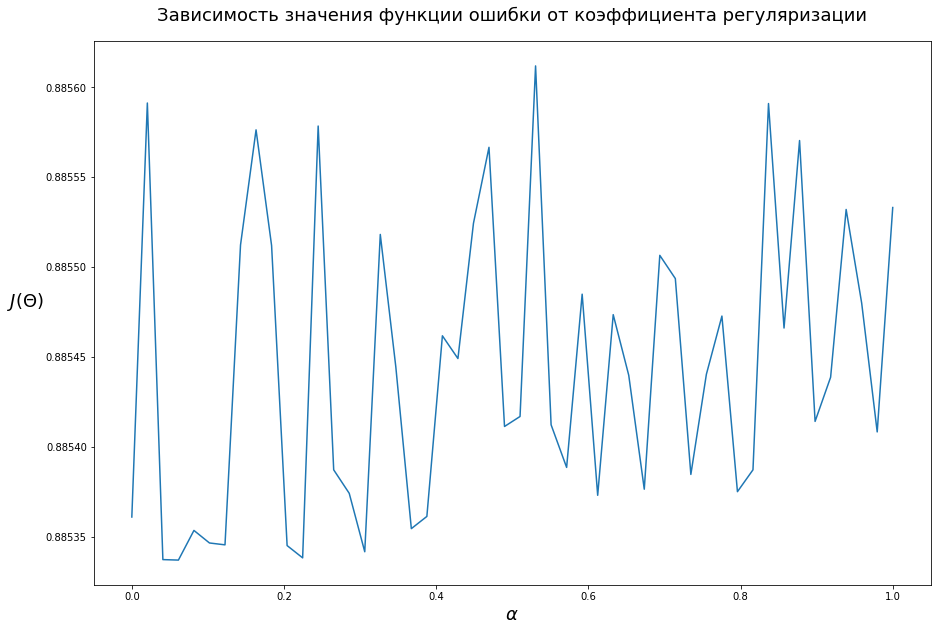

In [136]:
plot_error_ridge(X, y, [0, 1])

In [127]:
def plot_error_polynomial(X, y, degrees):
    d_min, d_max = degrees
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    plt.figure(figsize=(15, 10))
    plt.ylabel(r"$J(\Theta)$", fontsize=18, labelpad=20, rotation=0)
    plt.xlabel(r"$d$", fontsize=18)
    
    Js_train = []
    Js_test = []
    degrees = list(range(d_min, d_max+1))
    for d in degrees:
        thetas = butch_gd(X_train, y_train, 0.2, degree=d)
        Js_train.append(Js[-1])
        X_b = np.c_[np.ones((len(X_test), 1)), PolynomialFeatures(degree=d, include_bias=False).fit_transform(X_test)]
        Js_test.append(np.sqrt(mean_squared_error(y_test, X_b.dot(thetas))))
        
    plt.plot(degrees, Js_train, 'b-^' ,label='Тренировочный')
    plt.plot(degrees, Js_test, 'g-o',label='Тестовый')
    plt.legend(loc="upper right", fontsize=14)
    plt.axis([d_min, d_max, 0, 10])
    plt.title('Зависимость значения ошибки от степени полинома', fontsize=18, pad=20)

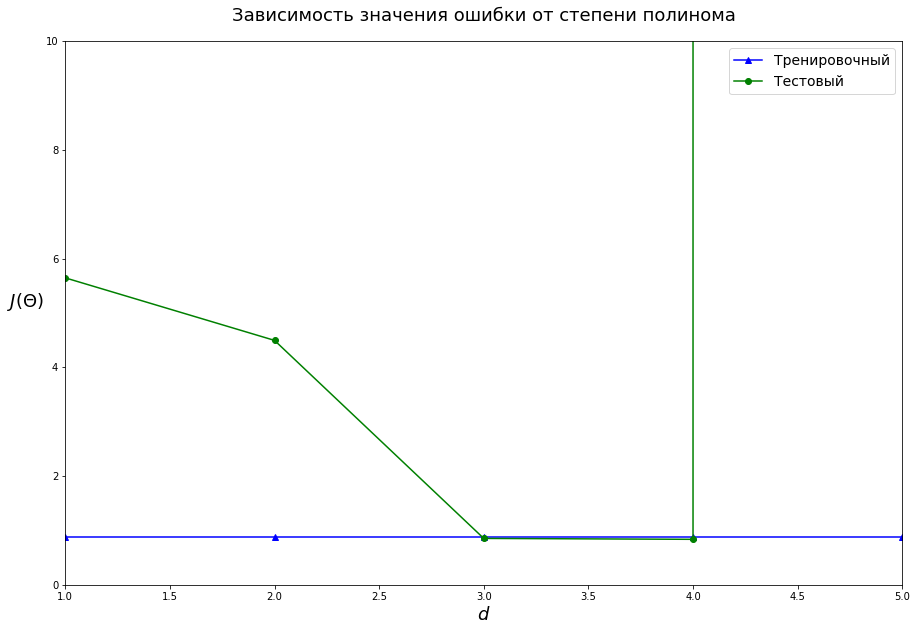

In [128]:
plot_error_polynomial(X, y, [1, 5])

## Кривые обучения

In [150]:
def plot_learning_curves(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    train_err, test_err = [], []

    for m in range(1, len(X_train)):
        Js_train = []
        thetas = butch_gd(X_train[:m], y_train[:m], 0.2, 3, J_buf=Js_train)
        
        X_b = np.c_[np.ones((len(X_test), 1)), PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)]
        
        test_err.append(np.sqrt(mean_squared_error(y_test, X_b.dot(thetas))))
        train_err.append(Js_train[-1])
    
    plt.figure(figsize=(15, 10))
    plt.plot(train_err, "r-+", linewidth=2, label="Тренировочный")
    plt.plot(test_err, "b-", linewidth=3, label="Тестовый")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Размер тренировочных данных", fontsize=18, labelpad=20)
    plt.ylabel("RMSE", fontsize=18, labelpad=20)             
    plt.title('Кривые обучения', fontsize=18, pad=20)

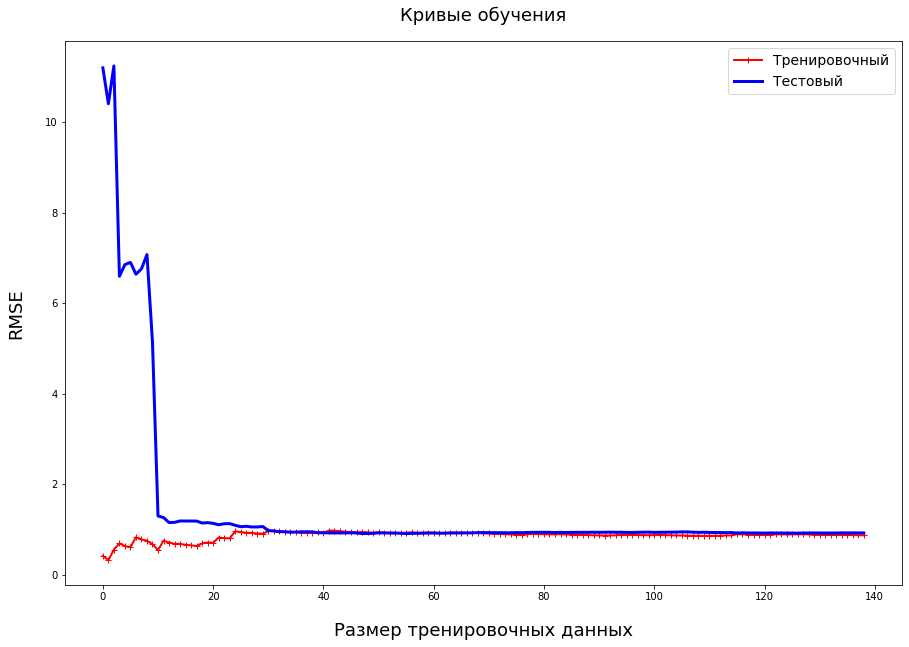

In [151]:
plot_learning_curves(X, y)

# Логистическая регрессия

In [12]:
from sklearn.datasets import make_classification

In [26]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0)

Text(0, 0.5, '$\\theta_2$')

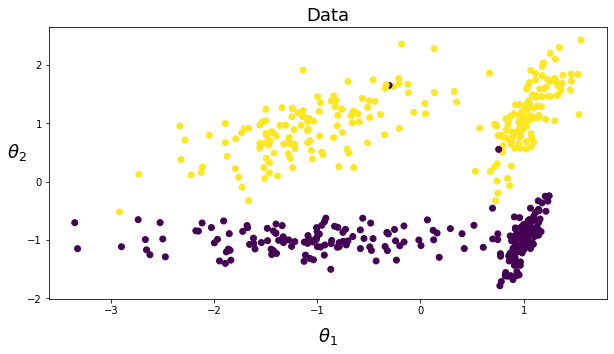

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data', fontsize=18)
plt.xlabel(r'$\theta_1$', fontsize=18, labelpad=10)
plt.ylabel(r'$\theta_2$', rotation=0, fontsize=18, labelpad=10)

In [ ]:
def butch_gd(X, y, alpha, degree, n_iterations=1000, eta=0.01, thetas_buf=None, J_buf=None):
    thetas = np.random.uniform(0, 2, (degree+1, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X)]
    
    for i in range(n_iterations):
        if J_buf is not None:
            J = np.sqrt(1/m * np.sum((X_b.dot(thetas) - y)**2))
            J_buf.append(J)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y) + 2/m * alpha * thetas
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas